In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors as mpc

%matplotlib notebook

plt.style.use('Solarize_Light2')

df = pd.read_excel('T52.xlsx', skiprows=2, skipfooter=10)

In [2]:
#Rename all column names
df.columns = ['Country','1980', '1981', '1982', '1983','1984','1985','1986','1987','1988','1989',
             '1990', '1991', '1992', '1993','1994','1995','1996','1997','1998','1999',
             '2000', '2001', '2002', '2003','2004','2005','2006','2007','2008','2009',
             '2010', '2011', '2012', '2013','2014','2015','2016','2017','2018','2019',
             '2020', '2021']

#Replace na string with 0
df.replace('na', 0, inplace=True)

#Round off all values to 1 decimal place
df = df.round(1)

#Set Country column as index
df = df.set_index('Country')
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
OECD Americas,1412.9,1616.4,2133.0,2191.2,2199.4,2234.6,2062.7,2184.0,2225.1,2099.9,...,3157.0,3463.3,3846.9,4013.3,4607.0,5315.0,6509.1,7539.2,7551.1,7266.4
Canada,205.1,163.0,230.2,309.6,308.7,427.9,469.5,527.6,607.0,530.9,...,1756.9,2058.7,2276.2,2301.2,2742.2,2892.9,3177.8,3357.3,3145.6,3195.0
Mexico,920.8,1225.4,1666.8,1717.6,1709.6,1602.7,1439.2,1505.4,1463.1,1427.1,...,1333.1,1270.7,1219.8,1247.1,1273.8,1264.1,1283.3,1199.9,1198.5,1091.4
United States,287.0,228.0,236.0,164.0,181.0,204.0,154.0,151.0,155.0,142.0,...,67.0,134.0,351.0,465.0,591.0,1158.0,2048.0,2982.0,3206.0,2980.0
Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
#Extract y axis values for Russia and Saudi Arabia from 2011 to 2021 and store it in their variable names
russia = df.loc['Russia']
sa = df.loc['Saudi Arabia']

#Define the x axis values
years = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
         1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
         2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
         2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 
         2020, 2021]

<IPython.core.display.Javascript object>


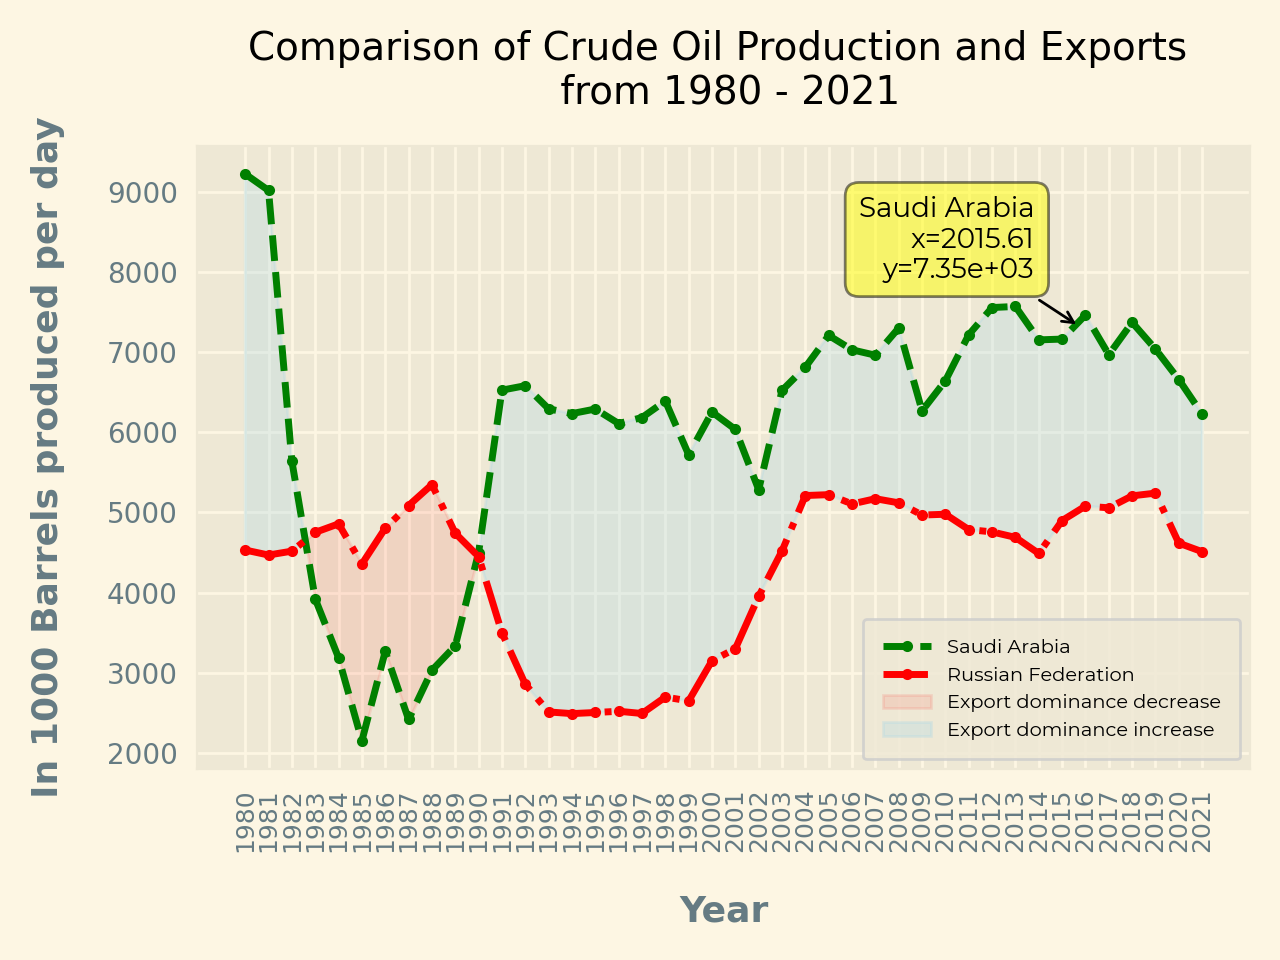

In [4]:
#Plot line
plt.plot(years, sa, color='green', linestyle='--', linewidth=2.5, marker='.', label='Saudi Arabia')
plt.plot(years, russia, color='red', linestyle='dashdot', linewidth=2.5, marker='.', label='Russian Federation')

#Plot decreased dominance for fill between
plt.fill_between(years, russia, sa,
                 where=(russia > sa),
                 interpolate='True',
                 color='red',
                 alpha=0.09,
                 label='Export dominance decrease')

#Plot increased dominance for fill between
plt.fill_between(years, russia, sa,
                 where=(russia <= sa),
                 interpolate='True',
                 color='lightblue',
                 alpha=0.30,
                 label='Export dominance increase')

plt.rcParams['font.family'] = 'montserrat'
plt.title('Comparison of Crude Oil Production and Exports \n from 1980 - 2021',
          fontsize=14,
          fontweight='medium',
          pad=15)

plt.xlabel('Year', fontsize=13,
           fontweight='bold',
           labelpad=15)

plt.ylabel('In 1000 Barrels produced per day', fontsize=13,
        fontweight='bold',
        labelpad=15)

plt.xticks(years, fontsize=9, rotation=90)
plt.yticks(fontsize=10)
plt.tick_params(left = False, bottom = False)

plt.legend(loc=4, 
           fontsize=7,
           borderpad=1,
           labelspacing=0.5,
           handlelength=2.5)

#Peer review feedbacked on low data to ink ratio.  Removal of grid lines was preferred.
plt.grid(True)
mpc.cursor(hover=True)
plt.savefig('plot.png')
plt.tight_layout()